
# Statistical Data Analysis

## Project Description

The telecom operator company, Megaline, offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

In this project, I am going to carry out a preliminary analysis of the plans based on a relatively small client selection. I'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. I will be analysing clients' behavior and determine which prepaid plan brings in more revenue for the company.

**I will be performing the following tasks in order to accomplish my goal in this project:**

##### 1. Loading the datasets and Studying General Informations <a class="anchor" id="Step 1"></a>
- Loading datasets with 5 different tables named: **calls, messages, users, internet, plans**
- Printing the first 5 rows of each tables to review the general information.

##### 2. Prepare the data <a class="anchor" id="Step 2"></a>
- Converting the data to the necessary types
- Finding and eliminating errors in the data such as filling in missing values, deleting duplicates, etc. when necessary
- Performing Calculations
  - Finding the number of calls made and minutes used per months for each users
  - Finding the number of text messages sent per month for each users
  - Finding the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages,      and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)

##### 3. Analysing the data <a class="anchor" id="Step 3"></a>
- Describing the customer's behavior by finding the minutes, texts, and volume of data the users of each plan require per         month.
- Calculating the mean, variance, and standard deviation.
- Plotting histograms.
- Describing the distributions

##### 4. Testing the hypothesis <a class="anchor" id="Step 4"></a>
- Testing hypothesis on:
  - The average revenue from users of Ultimate and Surf calling plans differs.
  - The average revenue from users in NY-NJ area is different from that of the users from other regions.
- Deciding what alpha value to use.
- Explain:
  - How I formulated the null and alternative hypotheses.
  - What criterion I used to test the hypotheses and why.

##### 5. Writing an overall conclusion <a class="anchor" id="Step 5"></a>

### Description of the prepaid plans

Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

**Surf**
1. Monthly charge: 20 (in USD)
2. 500 monthly minutes, 50 texts, and 15 GB of data
3. After exceeding the package limits:
   - 1 minute: 3 cents
   - 1 text message: 3 cents
   - 1 GB of data: 10 (in USD)

**Ultimate**
1. Monthly charge: 70 (in USD)
2. 3000 monthly minutes, 1000 text messages, and 30 GB of data
3. After exceeding the package limits:
   - 1 minute: 1 cent
   - 1 text message: 1 cent
   - 1 GB of data: 7 (in USD)

## Data Description

Remember! Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

**The users table (data on users):**
- user_id — unique user identifier
- first_name — user's name
- last_name — user's last name
- age — user's age (years)
- reg_date — subscription date (dd, mm, yy)
- churn_date — the date the user stopped using the service (if the value is missing, the calling plan was being used when this database was extracted)
- city — user's city of residence
- plan — calling plan name

**The calls table (data on calls):**
- id — unique call identifier
- call_date — call date
- duration — call duration (in minutes)
- user_id — the identifier of the user making the call

**The messages table (data on texts):**
- id — unique text message identifier
- message_date — text message date
- user_id — the identifier of the user sending the text

**The internet table (data on web sessions):**
- id — unique session identifier
- mb_used — the volume of data spent during the session (in megabytes)
- session_date — web session date
- user_id — user identifier

**The plans table (data on the plans):**
- plan_name — calling plan name
- usd_monthly_fee — monthly charge in US dollars
- minutes_included — monthly minute allowance
- messages_included — monthly text allowance
- mb_per_month_included — data volume allowance (in megabytes)
- usd_per_minute — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)
- usd_per_message — price per text after exceeding the package limits
- usd_per_gb — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)

# Step 1. Open the data file and study the general information. <a class="anchor" id="Step 1"></a>

**Importing necessary python libraries**

In [133]:
import pandas as pd
import numpy as np
import random
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from statsmodels.stats import weightstats as statsmodelsweightstats
from statsmodels.stats.weightstats import ttest_ind

**Reading the CSV files containing our datasets**

In [134]:
##reading a csv file containing users data
try:
    users = pd.read_csv("/Users/rsavy/Downloads/megaline_users.csv")
    
except:
    users = pd.read_csv("/datasets/megaline_users.csv")

##reading a csv file containing plans data
try:
    plans = pd.read_csv("/Users/rsavy/Downloads/megaline_plans.csv")
    
except:
    plans = pd.read_csv("/datasets/megaline_plans.csv")

##reading a csv file containing messages data
try:
    messages = pd.read_csv("/Users/rsavy/Downloads/megaline_messages.csv")
    
except:
    messages = pd.read_csv("/datasets/megaline_messages.csv")

##reading a csv file containing internet data
try:
    internet = pd.read_csv("/Users/rsavy/Downloads/megaline_internet.csv")
    
except:
    internet = pd.read_csv("/datasets/megaline_internet.csv")
    
#reading a csv file containing calls data
try:
    calls = pd.read_csv("/Users/rsavy/Downloads/megaline_calls.csv")
    
except:
    calls = pd.read_csv("/datasets/megaline_calls.csv") 

**Printing the first five rows of each datasets to get a general ideas on how our data look like**

In [135]:
print("Plans Dataset")
plans.head()


Plans Dataset


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [136]:
print("Calls Dataset")
calls.head()

Calls Dataset


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [137]:
print("Internet Dataset")
internet.head()

Internet Dataset


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [138]:
print("Messages Dataset")
messages.head()

Messages Dataset


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [139]:
print("Users Dataset")
users.head()

Users Dataset


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


**Observing the datatypes and total entries in each columns**

In [140]:
print("Information on 'users' table")
users.info()
print("")

print("Information on 'calls' table")
calls.info()
print("")

print("Information on 'Messages' table")
messages.info()
print("")

print("Information on 'internet' table")
internet.info()
print("")

print("Information on 'plans' table")
plans.info()


Information on 'users' table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

Information on 'calls' table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

Information on 'Messages' table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 

**Observing the counts of missing values in each tables**

In [141]:
users.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [142]:
calls.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [143]:
plans.isnull().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [144]:
messages.isnull().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [145]:
internet.isnull().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

**Checking for duplicate rows in each tables**

In [146]:
print('There are',plans.duplicated().sum(), 'duplicate values in "plan" table')
print('There are',calls.duplicated().sum(), 'duplicate values in "calls" table')
print('There are',messages.duplicated().sum(), 'duplicate values in "messages" table')
print('There are',users.duplicated().sum(), 'duplicate values in "users" table')
print('There are',internet.duplicated().sum(), 'duplicate values in "internet" table')

There are 0 duplicate values in "plan" table
There are 0 duplicate values in "calls" table
There are 0 duplicate values in "messages" table
There are 0 duplicate values in "users" table
There are 0 duplicate values in "internet" table


**Conclusion**

1. We will need to perform datatype conversion. We will change **reg_date, churn_date, call_date, message_date, session_date** from object datatype to datetime.
2. We have missing values in **churn_date** column of **users** table.
3. We do not have any duplicates in our datasets.

# Step 2. Prepare the Data

**Changing Datatypes**

In [147]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

In [148]:
users.info()
calls.info()
messages.info()
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null datetime64[ns]
plan          500 non-null object
churn_date    34 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null datetime64[ns]
duration     137735 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date   

**Looking closely on Missing Values**

In [149]:
data_with_null = users[users.isnull().any(axis=1)]
data_with_null.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


If we look into the **data description** section, it is mentioned that if the **churn_date** column has missing values, that means the calling plan was being used when this database was extracted). That means those users are still using the service and are the current customers.


**Extracting months from date columns in "calls","internet", and "messages" tables and converting them into months name**

In [150]:
messages['month'] = messages['message_date'].dt.strftime('%B')
calls['month'] = calls['call_date'].dt.strftime('%B')
internet['month'] = internet['session_date'].dt.strftime('%B')
messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,December
1,1000_160,1000,2018-12-31,December
2,1000_223,1000,2018-12-31,December
3,1000_251,1000,2018-12-27,December
4,1000_255,1000,2018-12-26,December


In [151]:
internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,December
1,1000_204,1000,2018-12-31,0.00,December
2,1000_379,1000,2018-12-28,660.40,December
3,1000_413,1000,2018-12-26,270.99,December
4,1000_442,1000,2018-12-27,880.22,December


In [152]:
calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,December
1,1000_145,1000,2018-12-27,13.66,December
2,1000_247,1000,2018-12-27,14.48,December
3,1000_309,1000,2018-12-28,5.76,December
4,1000_380,1000,2018-12-30,4.22,December


**Calculating the number of calls made, minutes used, messages sent, data used per month for each users**

In [153]:
#Calls per user per month
calls_made = calls.groupby(['user_id','month']).agg({'id':'count'}).rename(columns={'id':'Calls Made'})

#Minutes per user per month
min_spent = calls.groupby(['user_id','month']).agg({'duration':'sum'}).rename(columns={'duration':'Minutes Spent'})
 
#Traffic per user per month
mb_used = internet.groupby(['user_id','month']).agg({'mb_used':'sum'}).rename(columns={'mb_used':'Mb Used'})
 
#Messages per user per month
messages_sent = messages.groupby(['user_id','month']).agg({'id':'count'}).rename(columns={'id':'Messages Sent'})
 
#Plan for each user
plan = users[['user_id','plan']]
 
#Combined into one table
df1 = calls_made.join(min_spent, on= ["user_id","month"])
df2 = df1.join(mb_used, on= ["user_id","month"])
df_usage = df2.join(messages_sent, on= ["user_id","month"]).reset_index().merge(plan, on='user_id')
df_usage.head(20)

**Converting data in megabytes to gigabytes and rounding up Data Usage and Minutes Spent**

In [22]:
df_usage['gb_used'] = np.ceil(df_usage['Mb Used'] / 1024)
df_usage['Minutes Spent'] = np.ceil(df_usage['Minutes Spent'])
df_usage.head()

,user_id,month,Calls Made,Minutes Spent,Mb Used,Messages Sent,plan,gb_used
0,1000,December,16,117.0,1901.47,11.0,ultimate,2.0
1,1001,August,27,172.0,6919.15,30.0,surf,7.0
2,1001,December,56,393.0,19369.18,44.0,surf,19.0
3,1001,November,64,405.0,18504.30,36.0,surf,19.0
4,1001,October,65,375.0,22330.49,53.0,surf,22.0


**Checking for Null Values in New Table**

In [23]:
df_usage.isnull().sum()

user_id            0
month              0
Calls Made         0
Minutes Spent      0
Mb Used           15
Messages Sent    485
plan               0
gb_used           15
dtype: int64

In [24]:
null_data = df_usage[df_usage.isna().any(axis=1)]
null_data.sample(10)

,user_id,month,Calls Made,Minutes Spent,Mb Used,Messages Sent,plan,gb_used
325,1071,August,74,490.0,13747.50,NaN,surf,14.0
504,1109,June,78,543.0,12202.07,NaN,surf,12.0
1953,1426,December,82,583.0,28124.62,NaN,ultimate,28.0
1998,1437,November,60,445.0,15189.99,NaN,surf,15.0
1311,1288,December,45,263.0,14622.88,NaN,surf,15.0
1443,1321,November,72,491.0,11822.98,NaN,surf,12.0
542,1117,July,57,423.0,17769.81,NaN,surf,18.0
799,1171,June,47,288.0,18007.14,NaN,surf,18.0
500,1109,April,29,202.0,8246.83,NaN,surf,9.0
54,1012,November,10,72.0,13935.03,NaN,surf,14.0


Here, I see we have null values in columns which we created by combining individual values into monthly value. Therefore, we have null values for all those rows if customer had no activities for that month. For example, if a customer did not sent any messages in November, we have NaN value for **Message Sent** column for that customer.

I am going to give **0** value for all **Null values** in the newly added columns in our dataset so that the dataset looks cleaner and we can maintain the originality of the dataset.

In [25]:
df_usage.fillna(value = 0, inplace=True)
df_usage.isnull().sum()

user_id          0
month            0
Calls Made       0
Minutes Spent    0
Mb Used          0
Messages Sent    0
plan             0
gb_used          0
dtype: int64

In [26]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Adding a new column **gb_used** in **plans** table.

In [27]:
plans['gb_included'] = plans['mb_per_month_included']/ 1024
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


Renaming ***plan_name*** column as ***plan*** in plans table.

In [28]:
plans = plans.rename(columns={'plan_name': 'plan'})
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan,gb_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


**Merging *df_usage* table with *plans* table on "plan"**

In [29]:
result = df_usage.merge(plans, on = "plan")
result.head()

,user_id,month,Calls Made,Minutes Spent,Mb Used,Messages Sent,plan,gb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_included
0,1000,December,16,117.0,1901.47,11.0,ultimate,2.0,1000,30720,3000,70,7,0.01,0.01,30.0
1,1006,December,9,55.0,32118.82,139.0,ultimate,32.0,1000,30720,3000,70,7,0.01,0.01,30.0
2,1006,November,2,10.0,2068.37,15.0,ultimate,3.0,1000,30720,3000,70,7,0.01,0.01,30.0
3,1008,December,85,601.0,14689.33,26.0,ultimate,15.0,1000,30720,3000,70,7,0.01,0.01,30.0
4,1008,November,63,423.0,23676.72,37.0,ultimate,24.0,1000,30720,3000,70,7,0.01,0.01,30.0


**Calculating the Monthly Revenue for each User**

In [30]:
minute_revenue = np.where(result['Minutes Spent'] > result['minutes_included'],((result['Minutes Spent']-result['minutes_included'])* result['usd_per_minute']),0)
message_revenue = np.where(result['Messages Sent'] > result['messages_included'],((result['Messages Sent']-result['messages_included'])* result['usd_per_message']),0)
data_revenue = np.where(result['gb_used'] > result['gb_included'],((result['gb_used']-result['gb_included'])* result['usd_per_gb']),0)
    
result['monthly_revenue'] = message_revenue + minute_revenue + data_revenue + result['usd_monthly_pay']
result.head(10) 


,user_id,month,Calls Made,Minutes Spent,Mb Used,Messages Sent,plan,gb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_included,monthly_revenue
0,1000,December,16,117.0,1901.47,11.0,ultimate,2.0,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
1,1006,December,9,55.0,32118.82,139.0,ultimate,32.0,1000,30720,3000,70,7,0.01,0.01,30.0,84.0
2,1006,November,2,10.0,2068.37,15.0,ultimate,3.0,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
3,1008,December,85,601.0,14689.33,26.0,ultimate,15.0,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
4,1008,November,63,423.0,23676.72,37.0,ultimate,24.0,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
5,1008,October,71,451.0,17106.99,21.0,ultimate,17.0,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
6,1011,August,61,461.0,21099.37,54.0,ultimate,21.0,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
7,1011,December,56,293.0,19630.63,61.0,ultimate,20.0,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
8,1011,July,63,473.0,21046.41,53.0,ultimate,21.0,1000,30720,3000,70,7,0.01,0.01,30.0,70.0
9,1011,June,19,112.0,6685.11,21.0,ultimate,7.0,1000,30720,3000,70,7,0.01,0.01,30.0,70.0


In [31]:
#Reviewer's code
result[result['user_id'] == 1447]


,user_id,month,Calls Made,Minutes Spent,Mb Used,Messages Sent,plan,gb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_included,monthly_revenue
2132,1447,December,85,553.0,37464.81,71.0,surf,37.0,50,15360,500,20,10,0.03,0.03,15.0,242.22
2133,1447,November,69,458.0,40217.22,68.0,surf,40.0,50,15360,500,20,10,0.03,0.03,15.0,270.54
2134,1447,October,20,165.0,6043.80,17.0,surf,6.0,50,15360,500,20,10,0.03,0.03,15.0,20.00


**Validating the Monthly_Revenue values Manually**

- Taking the last four rows of the dataset

In [32]:
result.tail(4)

,user_id,month,Calls Made,Minutes Spent,Mb Used,Messages Sent,plan,gb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_included,monthly_revenue
2254,1499,December,65,469.0,22059.21,0.0,surf,22.0,50,15360,500,20,10,0.03,0.03,15.0,90.0
2255,1499,November,45,289.0,16813.83,0.0,surf,17.0,50,15360,500,20,10,0.03,0.03,15.0,40.0
2256,1499,October,53,364.0,19492.43,0.0,surf,20.0,50,15360,500,20,10,0.03,0.03,15.0,70.0
2257,1499,September,41,331.0,12984.76,0.0,surf,13.0,50,15360,500,20,10,0.03,0.03,15.0,20.0


**We calcualted the Monthly_Revenue on the Basis of this Rule**:

Monthly_revenue = message_revenue + minute_revenue + data_revenue + result['usd_monthly_pay']

**Surf: Monthly charge: 20 (in USD)**
- 500 monthly minutes, 50 texts, and 15 GB of data
- After exceeding the package limits:
  - 1 minute: 3 cents
  - 1 text message: 3 cents
  - 1 GB of data: 10 (in USD)
  
**Ultimate:Monthly charge: 70 (in USD)**
- 3000 monthly minutes, 1000 text messages, and 30 GB of data
- After exceeding the package limits:
  - 1 minute: 1 cent
  - 1 text message: 1 cent
  - 1 GB of data: 7 (in USD)

In [33]:
print("For user_id","1499")
print("September Revenue:",(20+0))
print()
print("For user_id","1499")
print("October Revenue:",(20+ ((20-15)*10)))
print()
print("For user_id","1499")
print("November Revenue:",(20+ ((17-15)*10)))
print()
print("For user_id","1499")
print("December Revenue:",20+ ((22-15)*10))

For user_id 1499
September Revenue: 20

For user_id 1499
October Revenue: 70

For user_id 1499
November Revenue: 40

For user_id 1499
December Revenue: 90


- I have same values from manual calculation and automated calculation, Therefore I confirm that Monthly_Revenue calcualtion is correct

**Conclusion**

- Changed the data-types of date columns from several tables:**reg_date** and **churn_date** from users table,**call_date** from calls table, **message_date** from messages table, **session_date** from internet table.
- Added **month** column in **calls**,**messages**, and **internet** table.
- Calculated calls_made, messages_sent, minutes_spent, gb_used and merged it to a new dataframe along with user_id and month.
- Calcualted monthly revenue for each users and added to the table and validated the results with manual calculation.


# Step 3: Analyzing the Data

Observing the minutes, texts, and volume of data the users of each plan require per month along with the Monthly Revenue from each plans

In [34]:
User_required_service = pd.pivot_table(result, values=['gb_used','Messages Sent','Minutes Spent','monthly_revenue'], index = ['month','plan'], aggfunc=np.sum)
User_required_service.sort_values(by='monthly_revenue',ascending=False)

,,Messages Sent,Minutes Spent,gb_used,monthly_revenue
month,plan,,,,
December,surf,11884.0,142459.0,5627.0,21372.00
November,surf,8896.0,113219.0,4538.0,15718.86
October,surf,7718.0,96270.0,4024.0,14944.92
December,ultimate,6718.0,65466.0,2741.0,10885.00
September,surf,5802.0,75942.0,3160.0,10851.55
August,surf,4588.0,62801.0,2696.0,10179.43
November,ultimate,4861.0,53460.0,2153.0,9037.00
October,ultimate,4179.0,45124.0,1878.0,7595.00
July,surf,3243.0,51425.0,2025.0,7489.41


- We can see customers using **surf** plan uses more data, call minutes and text service and hence We generate more revenue from customers who uses Surf plan.
- There is high traffic of service usuage in December with Surf Plan.

**Querying Customers Data who uses Surf Plan**

In [35]:
surf_query = result.query('plan=="surf"').reset_index()
surf = surf_query[['user_id','Messages Sent','month','Minutes Spent','gb_used','monthly_revenue']]
surf.head()

,user_id,Messages Sent,month,Minutes Spent,gb_used,monthly_revenue
0,1001,30.0,August,172.0,7.0,20.00
1,1001,44.0,December,393.0,19.0,60.00
2,1001,36.0,November,405.0,19.0,60.00
3,1001,53.0,October,375.0,22.0,90.09
4,1001,44.0,September,298.0,14.0,20.00


**Querying Customers Data who uses Surf Plan**

In [36]:
ultimate_query = result.query('plan=="ultimate"').reset_index()
ultimate = ultimate_query[['user_id','Messages Sent','month','Minutes Spent','gb_used','monthly_revenue']]
ultimate.head()

,user_id,Messages Sent,month,Minutes Spent,gb_used,monthly_revenue
0,1000,11.0,December,117.0,2.0,70.0
1,1006,139.0,December,55.0,32.0,84.0
2,1006,15.0,November,10.0,3.0,70.0
3,1008,26.0,December,601.0,15.0,70.0
4,1008,37.0,November,423.0,24.0,70.0


### Observing the Data Distribution on Messages, Minutes, and Data Usage on Each Plan

**Messages Sent per Month**

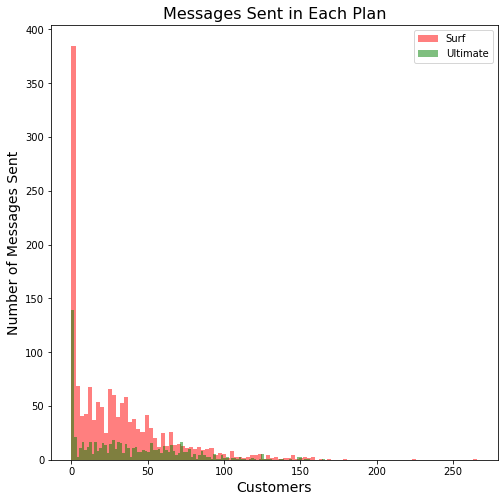

In [37]:
plt.figure(figsize=(8,8))
plt.hist(surf['Messages Sent'], bins=100, alpha=0.5,color="red", label="Surf")
plt.hist(ultimate['Messages Sent'], bins=100, alpha=0.5,color="green", label="Ultimate")
plt.xlabel("Customers", size=14)
plt.ylabel("Number of Messages Sent", size=14)
plt.title("Messages Sent in Each Plan", size=16)
plt.legend(loc='upper right')


- The Monthly Messages service used by customers with both Ultimate and Surf plan shows **Right-Skewed distribution** which can also be interpreted as the **Mean > Median** for this data.
- Customers using Surf Plan uses messages service more than the customers using Ultimate plan.


**Minutes Spent Per Month**

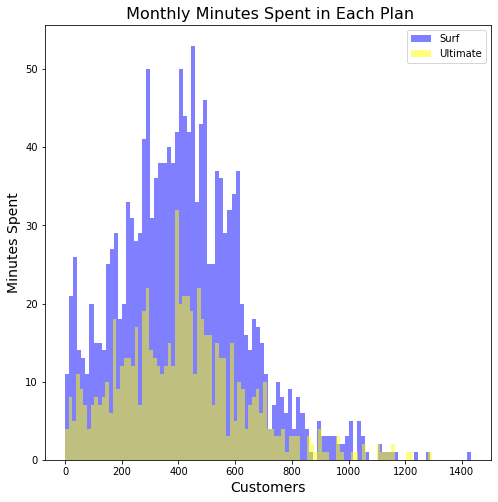

In [38]:
plt.figure(figsize=(8,8))
plt.hist(surf['Minutes Spent'], alpha=0.5, bins=100,color="blue", label="Surf")
plt.hist(ultimate['Minutes Spent'], bins=100, alpha=0.5,color="yellow", label="Ultimate")
plt.xlabel("Customers", size=14)
plt.ylabel("Minutes Spent", size=14)
plt.title(" Monthly Minutes Spent in Each Plan", size=16)
plt.legend(loc='upper right')

- The Monthly Minutes spent by customers with both Ultimate and Surf plan shows **Right-Skewed distribution** which can also be interpreted as the **Mean is greater than Median** for this data.
- Customers using Surf Plan spends more time on calls than the customers using Ultimate plan.

**Volume of Data Used Per Month**

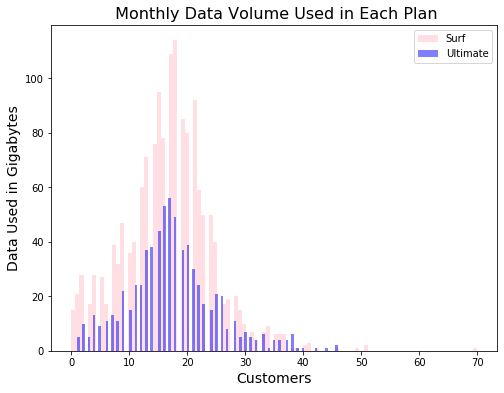

In [39]:
plt.figure(figsize=(8,6))
plt.hist(surf['gb_used'], bins=100, alpha=0.5,color="pink", label="Surf")
plt.hist(ultimate['gb_used'], bins=100, alpha=0.5, color="blue", label="Ultimate")
plt.xlabel("Customers", size=14)
plt.ylabel("Data Used in Gigabytes", size=14)
plt.title(" Monthly Data Volume Used in Each Plan", size=16)
plt.legend(loc='upper right')

- The volume of data consumption on each plans also shows **Right-Skewed distribution** which can also be interpreted as the **mean is greater than median** for this data.
- Customers using Surf Plan uses more volume of data than the customers using Ultimate plan.

**Monthly Revenue from Each Plan**

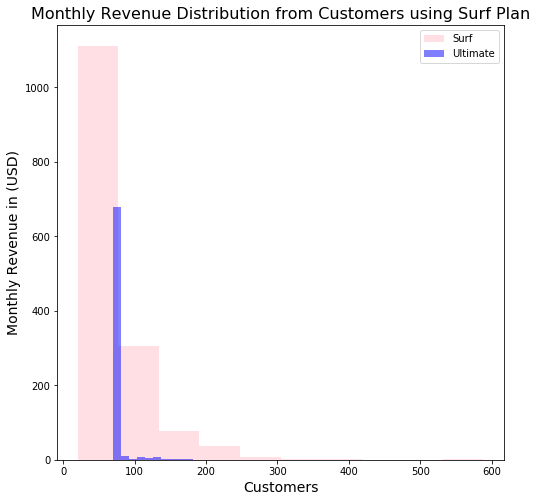

In [40]:
plt.figure(figsize=(8,8))
plt.hist(surf['monthly_revenue'], alpha=0.5,color="pink", label="Surf")
plt.hist(ultimate['monthly_revenue'], alpha=0.5, color="blue", label="Ultimate")
plt.xlabel("Customers", size=14)
plt.ylabel("Monthly Revenue in (USD)", size=14)
plt.title("Monthly Revenue Distribution from Customers using Surf Plan", size=16)
plt.legend(loc='upper right')

- This is also a **Right_Skewed** distribution. This data distribution looks quiet interesting.Customers using Surf plan brings comparatively huge amount of revenue than customers using Ultimate plan.

### Statistical Summary of Data

**Mean, Variance and Standard Deviation with Surf Plan Data**

In [41]:
stats_surf=surf[['Messages Sent','Minutes Spent','gb_used','monthly_revenue']]
mean_surf1= np.mean(stats_surf)
print("Mean for Surf data")
print(mean_surf1)
print()

variance_surf= np.var(stats_surf)
print("Variance for Surf data")
print(variance_surf)
print()

sd_surf = np.std(stats_surf)
print("Standard Deviation for Surf data")
print(sd_surf)

Mean for Surf data
Messages Sent       30.897735
Minutes Spent      412.594822
gb_used             16.620065
monthly_revenue     59.744252
dtype: float64

Variance for Surf data
Messages Sent       1131.216726
Minutes Spent      46972.581462
gb_used               59.064063
monthly_revenue     2849.540168
dtype: float64

Standard Deviation for Surf data
Messages Sent       33.633565
Minutes Spent      216.731589
gb_used              7.685315
monthly_revenue     53.381084
dtype: float64


In [42]:
stats_ultimate=ultimate[['Messages Sent','Minutes Spent','gb_used','monthly_revenue']]

mean_ultimate = np.mean(stats_ultimate)
print("Mean for Ultimate Data")
print(mean_ultimate)
print()

variance_ultimate = np.var(stats_ultimate)
print("Variance for Ultimate Data")
print(variance_ultimate)
print()


sd_ultimate = np.std(stats_ultimate)
print("Standard Deviation for Ultimate Data")
print(sd_ultimate)

Mean for Ultimate Data
Messages Sent       37.725105
Minutes Spent      410.701262
gb_used             17.370266
monthly_revenue     72.277700
dtype: float64

Variance for Ultimate Data
Messages Sent       1208.446172
Minutes Spent      50446.417067
gb_used               57.377629
monthly_revenue      128.685856
dtype: float64

Standard Deviation for Ultimate Data
Messages Sent       34.762712
Minutes Spent      224.602798
gb_used              7.574802
monthly_revenue     11.343979
dtype: float64


1. Mean
   - The **Average** Messages Sent, Minutes Spent and Data Used by both Ultimate Plan and Surf Plan customers are almost **close to each other**.

2. Variance
   - The data points in Minutes Spent is more **spread out from the mean** and other data points for Ultimate plan than Surf Plan.
   - The data points in Monthly revenue for Surf Plan is **highly spread out from the mean and other data points** for ultimate plan.


3. Standard Deviation
   - The data points for monthly revenue values are more spread out for Surf Plan than ultimate plan.
   - The data points for Minutes Spent is close to mean for Surf plan than for Ultimate plan.

# Step 4. Hypothesis Testing

 ### Experiment 1:
 **The average revenue from users of Ultimate and Surf calling plans differs.**

- **Null Hypothesis**: The average revenue from users of Ultimate and Surf calling plans belongs to the same statistical population.
- **Alternative Hypothesis**: The average revenue from users of Ultimate and Surf calling plans doesn't belong to the same statistical population.

I am choosing 0.05 for the value of alpha, which means there is 95% confidence that the conclusion of this test will be valid.

In this two-tailed hypothesis testing, I am testing whether the average revenue from Ultimate and Surf plans is same or not.

In [43]:
surf_revenue = surf['monthly_revenue']
ultimate_revenue = ultimate['monthly_revenue']
surf_revenue_observations = len(surf_revenue)
ultimate_revenue_observations=len(ultimate_revenue)
print("Surf Revenue Observation:",surf_revenue_observations)
print("Ultimate Revenue Observation:",ultimate_revenue_observations)

degrees_of_freedom = surf_revenue_observations + ultimate_revenue_observations  - 2
print("Degrees_of_freedom:",degrees_of_freedom)

Surf Revenue Observation: 1545
Ultimate Revenue Observation: 713
Degrees_of_freedom: 2256


This is a two-tailed t-test so each tail probability on the t-distribution is 0.025. We use that value below.

In [44]:
alpha = 0.05
two_tailed_test_prob_tail = alpha/2
t_critical = round(st.t.ppf(two_tailed_test_prob_tail, degrees_of_freedom),3)
print("t-critical",t_critical)

t-critical -1.961


- Since this is a two-tailed test, the t-critical value is actually ±1.961

In [45]:
tStat, pValue = st.ttest_ind(surf_revenue, ultimate_revenue, equal_var = True, nan_policy='omit') #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))


P-Value:6.596684931934826e-10 T-Statistic:-6.202352698767828


We can also confirm the variation in the mean by calculating the R-Square value to see the proportion of difference.

In [46]:
r_squared_revenue = round(tStat**2 / (tStat**2 + degrees_of_freedom), 3)
r_squared_revenue

0.017

Our Value of R-Square is 0.033. That means, there is only 3% differences between the Average Revenue of Surf Plan and Ultimate Plan.

From the experiment above, we got 2 conclusions:

  - P-value is less than 0.05 or value of alpha.
  - T-statistic value is less than calculated critical value.
We do not have enough evidence support either hypothesis.

Also, our R-square value suggests there is difference.

So, I want to conduct another hypothesis test: Levene Test.

In [47]:
print(surf_revenue.mean(), surf_revenue.median())
print(ultimate_revenue.mean(), ultimate_revenue.median())

59.74425242718446 40.33
72.27769985974754 70.0


There is variance in median and mean, so I will use Median for the Test

In [48]:
st.levene(surf_revenue, ultimate_revenue, center='median')

LeveneResult(statistic=423.0314867512972, pvalue=2.7072359981108696e-86)

**Conclusion 1**: From the Levene test above, we reject the null hypothesis and accept the alternative hypothesis.
We can reject null hypothesis with 2 basis in the experiment above:
1. P-value is less than 0.05 or value of alpha.
2. T-statistic value is greater than calculated critical value.

Therefore, we have enough evidence to reject the null hypothesis and accept that there is statistical insignificant differences between the average revenue from users of Ultimate and Surf calling plans.


### Experiment 2:

**The average revenue from users in NY-NJ area is different from that of the users from other regions.**

- **Null Hypothesis**: The average revenue from users in NY-NJ area and other regions belongs to same statistical population.
- **Alternative Hypothesis**: The average revenue from users in NY-NJ area and other regions does not belongs to same statistical population. 

I kept the Null Hypothesis as revenue of NY-NY is less than the users of other regions assuming that the average revenue from rest of the states could be higher than the  revenue from only 2 states. The "equal" sign is used as Null Hypothesis should always have "=" or "<=" or ">=" sign.

In [49]:
ny_nj_bool = users['city'].apply(lambda x: True if 'NY-NJ' in x else False)
ny_nj_users = users[ny_nj_bool]['user_id'].values.tolist()

sample_ny_nj = result[result['user_id'].isin(ny_nj_users)]['monthly_revenue']
sample_other = result[~result['user_id'].isin(ny_nj_users)]['monthly_revenue']

ny_nj_observations = len(sample_ny_nj)
other_observations=len(sample_other)

print("New York-New Jersey Revenue Observation:",ny_nj_observations)
print("Other City Revenue Observation:",other_observations)

degrees_of_freedom1 = ny_nj_observations + other_observations  - 2
print("Degrees_of_freedom:",degrees_of_freedom1)


New York-New Jersey Revenue Observation: 371
Other City Revenue Observation: 1887
Degrees_of_freedom: 2256


In [50]:
alpha = 0.05
two_tailed_test_prob_tail1 = alpha/2

t_critical1 = round(st.t.ppf(two_tailed_test_prob_tail1, degrees_of_freedom1), 3)
print("t-critical",t_critical1)

t-critical -1.961


- Since this is a two-tailed test, the t-critical value is actually ±1.961.

In [51]:
tStat1, pValue1 = st.ttest_ind(sample_ny_nj, sample_other, equal_var = True, nan_policy='omit') #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue1,tStat1))


P-Value:0.01586051056225454 T-Statistic:-2.4139334864749906


We can also confirm the variation in the mean by calculating the R-Square value to see the proportion of difference.

In [52]:
r_squared_revenue = round(tStat1**2 / (tStat1**2 + degrees_of_freedom1), 3)
r_squared_revenue

0.003

Our Value of R-Square is 0.003. That means, there is only 0.3% differences between the Average Revenue from NY-NJ customers and other city customers

**Conclusion 2**: From the experiment above, we cannot reject the null hypothesis as p-value is
1. P-value is less than 0.05 or value of alpha.
2. T-statistic value is negative. (If the absolute value of the experimental t-value is smaller than the value found on the degrees of freedom chart, then the means of the two groups can be said to be significantly different)

Therefore, we have enough evidence to reject the null hypothesis and accept the alternative hypothesis that there is statistical insignificant difference between the average revenue from users in NY-NJ area and other regions.

### Conclusion

I chose 0.05 for the value of alpha for both experiments because alpha=0.05 implies that there is 95% confidence that the conclusion of the test will be valid.

**Experiment 1**:

**2 Levene Test**
- **Null Hypothesis**: The average revenue from users of Ultimate and Surf calling plans belongs to the same statistical population.
- **Alternative Hypothesis**: There is statistical insignificant differences between the average revenue from users of Ultimate and Surf calling plans.

- critical value = ±1.961
- P-Value= 2.7072359981108696e-86
- T-Statistic= 423.03

**Conclusion 1**: From the experiment above, we reject the null hypothesis and accept the alternative hypothesis.
We can reject null hypothesis with 2 basis in the experiment above:
1. P-value is less than 0.05 or value of alpha.
2. T-statistic value is greater than calculated critical value.

Therefore, we have enough evidence to reject the null hypothesis and accept that there is statistical insignificant differences between the average revenue from users of Ultimate and Surf calling plans.

R-Square = 0.033 (There is 3% differences between the Average Revenue of Surf Plan and Ultimate Plan).


**Experiment 2**:

**The average revenue from users in NY-NJ area is different from that of the users from other regions.**
- **Null Hypothesis**: The average revenue from users in NY-NJ area and other regions belongs to same statistical population.
- **Alternative Hypothesis**: There is statistical insignificant difference between the average revenue from users in NY-NJ area and other regions.

**2 tailed T-Test**

- critical value = ±1.961
- T-Statistic=-2.41
- P-Value=0.01

**Conclusion 2**: From the experiment above, we reject the null hypothesis and accept the alternative hypothesis.
We can reject null hypothesis with 2 basis in the experiment above:
1. P-value is less than 0.05 or value of alpha.
2. T-statistic value is negative.(If the absolute value of the experimental t-value is smaller than the value found on the degrees of freedom chart, then the means of the two groups can be said to be significantly different)

Therefore, we have enough evidence to reject the null hypothesis and accept that there is statistical insignificant difference between the average revenue from users in NY-NJ area and other regions.

R-Square = 0.003 (There is only 0.3% differences between the Average Revenue from NY-NJ customers and other cities customers).

# Step 5: Conclusion

### Reading Data and Observing General Information:

1. We have 5 tables: Users, Messages, Internet, Calls, Plans.
2. We need to perform datatype conversion on **reg_date, churn_date, call_date, message_date, session_date** columns from object datatype to datetime.
3. We have missing values in **churn_date** column of **users** table. The data was missing for the customers who were still using the service when this database was created.
4. We do not have any duplicates in our datasets.

### Data Preprocessing and Doing Calculations:

1. Changed the data-types of date columns from several tables:**reg_date** and **churn_date** from users table,**call_date** from calls table, **message_date** from messages table, **session_date** from internet table.
2. Added **month** column in **calls**,**messages**, and **internet** table.
3. Calculated calls_made, messages_sent, minutes_spent, gb_used and merged it to a new dataframe along with user_id and month.
4. Calcualted monthly revenue for each users and added to the table and validated the results with manual calculation.

### Statistical Analysis:

-- General Insights on plans and services used

1. Customers using **surf** plan uses more data, call minutes and text service and hence We generate more revenue from customers who uses Surf plan.
2. There is high traffic of service usuage in December with Surf Plan.

-- Data Distribution

1. The Monthly Messages service used by customers with both Ultimate and Surf plan shows **Right-Skewed distribution** which can also be interpreted as the **Mean > Median** for this data.
2. Customers using Surf Plan uses messages service more than the customers using Ultimate plan.

3. The Monthly Minutes spent by customers with both Ultimate and Surf plan shows **Right-Skewed distribution** which can also be interpreted as the **Mean is greater than Median** for this data.
- Customers using Surf Plan spends more time on calls than the customers using Ultimate plan.

4. The volume of data consumption on each plans also shows **Right-Skewed distribution** which can also be interpreted as the **mean is greater than median** for this data.
- Customers using Surf Plan uses more volume of data than the customers using Ultimate plan.

5. The Monthly Revenue also a **Right_Skewed** distribution. This data distribution looks quiet interesting.Customers using Surf plan brings comparatively huge amount of revenue than customers using Ultimate plan.


-- Statistical Summary

1. Mean
   - The **Average** Messages Sent, Minutes Spent and Data Used by both Ultimate Plan and Surf Plan customers are **equal** or almost **close to each other**.



2. Variance
   - The data points in Minutes Spent is more **spread out from the mean** and other data points for Ultimate plan than Surf Plan.
   - The data points in Monthly revenue for Surf Plan is **highly spread out from the mean and other data points** for ultimate plan.


3. Standard Deviation
   - The data points for monthly revenue values are more spread out for Surf Plan than ultimate plan.
   - The data points for Minutes Spent is close to mean for Surf plan than for Ultimate plan.
   

### Hypothesis Testing

I chose 0.05 for the value of alpha for both experiments because alpha=0.05 implies that there is 95% confidence that the conclusion of the test will be valid.

**Experiment 1**:

**2 Levene Test**
- **Null Hypothesis**: The average revenue from users of Ultimate and Surf calling plans belongs to the same statistical population.
- **Alternative Hypothesis**: There is statistical insignificant differences between the average revenue from users of Ultimate and Surf calling plans.

- critical value = ±1.961
- P-Value= 2.7072359981108696e-86
- T-Statistic= 423.03

**Conclusion 1**: From the experiment above, we reject the null hypothesis and accept the alternative hypothesis.
We can reject null hypothesis with 2 basis in the experiment above:
1. P-value is less than 0.05 or value of alpha.
2. T-statistic value is greater than calculated critical value.

Therefore, we have enough evidence to reject the null hypothesis and accept that there is statistical insignificant differences between the average revenue from users of Ultimate and Surf calling plans.

R-Square = 0.033 (There is 3% differences between the Average Revenue of Surf Plan and Ultimate Plan).


**Experiment 2**:

**The average revenue from users in NY-NJ area is different from that of the users from other regions.**
- **Null Hypothesis**: The average revenue from users in NY-NJ area and other regions belongs to same statistical population.
- **Alternative Hypothesis**: There is statistical insignificant difference between the average revenue from users in NY-NJ area and other regions.

**2 tailed T-Test**

- critical value = ±1.961
- T-Statistic=-2.41
- P-Value=0.01

**Conclusion 2**: From the experiment above, we reject the null hypothesis and accept the alternative hypothesis.
We can reject null hypothesis with 2 basis in the experiment above:
1. P-value is less than 0.05 or value of alpha.
2. T-statistic value is negative.(If the absolute value of the experimental t-value is smaller than the value found on the degrees of freedom chart, then the means of the two groups can be said to be significantly different)

Therefore, we have enough evidence to reject the null hypothesis and accept that there is statistical insignificant difference between the average revenue from users in NY-NJ area and other regions.

R-Square = 0.003 (There is only 0.3% differences between the Average Revenue from NY-NJ customers and other cities customers).